In [1]:
from data.helpers.multi_column import column_boxes
import pymupdf
import fitz
from PIL import Image

In [12]:
pdf = pymupdf.open('2308.08384.pdf')
page = pdf[10]

In [3]:
page.mediabox

Rect(0.0, 0.0, 595.2760009765625, 841.8900146484375)

In [4]:
# pymupdf
FLAGS = fitz.TEXTFLAGS_DICT | fitz.TEXT_DEHYPHENATE & ~fitz.TEXT_PRESERVE_IMAGES
text_dict = page.get_text('dict', flags=FLAGS, sort=True)
for i, bbox in enumerate(text_dict['blocks']):
    rect = fitz.Rect(bbox['bbox'])
    page.draw_rect(rect, color=(1, 0, 0), width=2)
    page.insert_text(rect.tl, str(i), fontsize=20, color=(0, 0, 0))

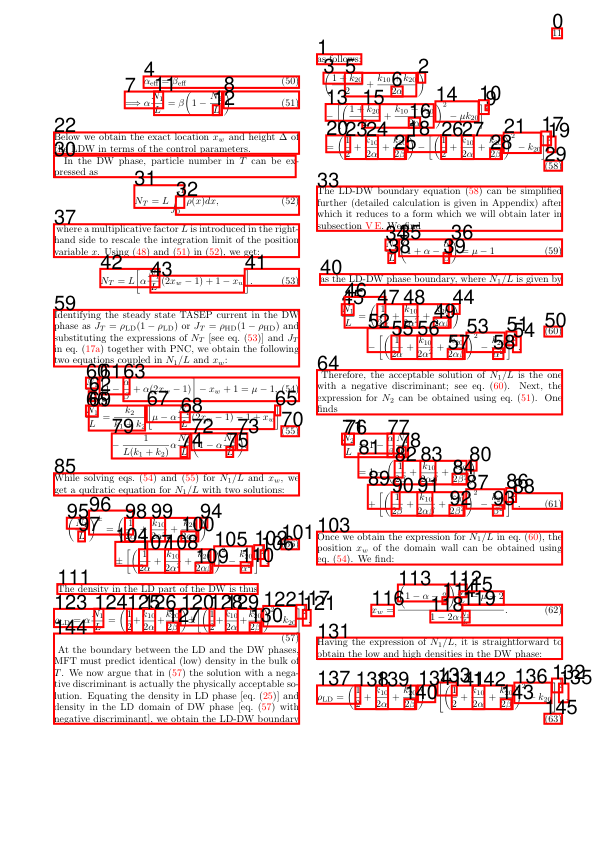

In [5]:
pix = page.get_pixmap()
mode = 'RGB'
img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)
img

In [ ]:
# pymupdf4llm
for i, rect in enumerate(column_boxes(page)):
    page.draw_rect(rect, color=(0, 1, 0), width=3)
    page.insert_text(rect.tl, str(i), fontsize=20, color=(0, 0, 0))

In [15]:
from olmocr.prompts.anchor import _pdf_report
from pymupdf import Point
# olmocr
objs = _pdf_report('2308.08384.pdf', 11)
for i, element in enumerate(objs.text_elements):
    if element.text and not element.text.isspace():
        point = Point(element.x, page.mediabox[3]-element.y)
        page.draw_circle(point, 5, color=(1, 0, 0), width=2)
        page.insert_text(point, str(i), fontsize=10, color=(0, 0, 1))

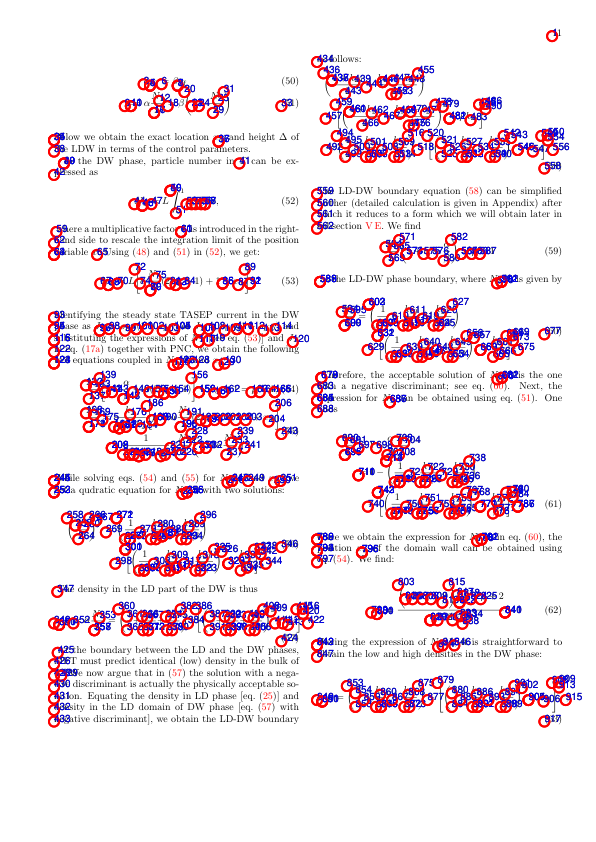

In [16]:
pix = page.get_pixmap()
mode = 'RGB'
img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)
img